# Solving 1D Potential Problems with Numerical Diagonalization
In this notebook we will learn how to numerically solve Schrodinger's equation for an arbitrary 1 dimensional potential well.  At the end of this notebook, you should know:

1. How to translate a differential equation (Schrodinger's equation in continuous space) into a matrix equation via finite differences

2. Construct matrices that represent the kinetic energy ($p$) and potential ($V(x)$) operators.

3. Know how to find the eigenvalues and eigenvectors of matrix in Python.

4. Understand how our numerical solutions relate to the exact solutions, i.e. what energy ranges are valid, what knobs exist in the algorithm to make it more accurate

5. Know how to calculate expectation values numerically.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib notebook

## Schrodinger Equation
Here is the Hamiltonian for a single particle in 1D:
$$ H = \frac{p^2}{2m}+V $$
In real space, it acts on the wavefunction as:
$$ H\psi(x) = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2}\psi(x) + V(x)\psi(x)$$
If we discretize space and use the finite difference approximation for the second derivative, we have:
$$ H\psi(x_i) = -\frac{1}{2}\frac{\psi(x_i+\Delta x)-2\psi(x_i) + \psi(x_i-\Delta x)}{\Delta x^2} + V(x_i)\psi(x_i) $$
Or, since $x_{i+1}=x_i+\Delta x$, we have:
$$ H\psi(x_i) = -\frac{1}{2}\frac{\psi(x_{i+1})-2\psi(x_i) + \psi(x_{i-1})}{\Delta x^2} + V(x_i)\psi(x_i) $$
We can view this as a matrix equation:
$$H\vec{\psi}=-\frac{1}{2}\frac{1}{\Delta x^2}\begin{bmatrix}-2 & 1 & 0 & ...\\1 & -2 & 1 & ... \\ & & ... & \\ ... & 0 & 1 & -2 \end{bmatrix} \begin{bmatrix} \psi(x_0) \\ \psi(x_1) \\ ... \\ \psi(x_{n-1})\end{bmatrix} + \begin{bmatrix}V(x_0) &  0 & 0 & ...\\0 & V(x_1) & 0 & ... \\ & & ... & \\ ... & 0 & 0 & V(x_{n-1}) \end{bmatrix} \begin{bmatrix} \psi(x_0) \\ \psi(x_1) \\ ... \\ \psi(x_{n-1})\end{bmatrix}$$
If we want to find the stationary states for the Hamiltonian, then we just need to find the eigenenergies and eigenstates (vectors) for the matrix $H$.
$$H\vec{\psi}_i=E_i \vec{\psi}_i $$

## Potential
We'll solve this system for a perturbed simple harmonic oscillator potential:
$$ V(x) = V(x,\omega, \epsilon) = \frac{1}{2}\omega^2 x^2 + \epsilon \theta(-x)$$
For $\epsilon=0$, we should recover the SHO solutions, and as $\epsilon \rightarrow \infty$, we should recover the solutions to the half-harmonic oscillator.

## Define our potential and matrices

In [157]:
# Get the potential V(x)
def V(x, omega, epsilon):
    x_half = x.copy()
    omegas = np.ones_like(x)*omega
    omegas_half = omegas.copy()
    omegas_half[x<0] = epsilon*1000
    return 0.5*omegas**2*x**2*(1-epsilon) + 0.5*omegas_half**2*x**2*epsilon
    #return 0.5*omega**2*x**2 + epsilon*np.cos(x)**2

# Get the matrix representing V
def V_matrix(x, omega, epsilon):
    size = len(x)
    V_mat = np.zeros(shape=(size,size))
    Vs = V(x, omega, epsilon)
    for i in range(0, size):
        V_mat[i,i] = Vs[i]
    return V_mat

# Get the matrix representing the finite difference d**2/dx**2
def second_deriv(x):
    size = len(x)
    dx = x[1]-x[0]
    d2_mat = np.zeros(shape=(size,size))
    for i in range(0, size):
        d2_mat[i,i] = -2
        if(i-1 >= 0):
            d2_mat[i-1,i] = 1
        if(i+1 < size):
            d2_mat[i+1,i] = 1
    
    d2_mat /= dx**2
    return d2_mat
    

## Find the eigenvalues and eigenvectors

In [158]:
x = np.arange(-10,10,0.1)   #Setup our discretized space

H = -0.5*second_deriv(x) + V_matrix(x,1,0)  # Construct our Hamiltonian
Vs = V(x,1,0)   # Get the potential for plotting
print(Vs)
print("H = ",H)
print("Shape of H = ", H.shape)
(evals, evecs) = np.linalg.eigh(H)
print('Energies = ', evals[0:5],"...")

[  5.00000000e+01   4.90050000e+01   4.80200000e+01   4.70450000e+01
   4.60800000e+01   4.51250000e+01   4.41800000e+01   4.32450000e+01
   4.23200000e+01   4.14050000e+01   4.05000000e+01   3.96050000e+01
   3.87200000e+01   3.78450000e+01   3.69800000e+01   3.61250000e+01
   3.52800000e+01   3.44450000e+01   3.36200000e+01   3.28050000e+01
   3.20000000e+01   3.12050000e+01   3.04200000e+01   2.96450000e+01
   2.88800000e+01   2.81250000e+01   2.73800000e+01   2.66450000e+01
   2.59200000e+01   2.52050000e+01   2.45000000e+01   2.38050000e+01
   2.31200000e+01   2.24450000e+01   2.17800000e+01   2.11250000e+01
   2.04800000e+01   1.98450000e+01   1.92200000e+01   1.86050000e+01
   1.80000000e+01   1.74050000e+01   1.68200000e+01   1.62450000e+01
   1.56800000e+01   1.51250000e+01   1.45800000e+01   1.40450000e+01
   1.35200000e+01   1.30050000e+01   1.25000000e+01   1.20050000e+01
   1.15200000e+01   1.10450000e+01   1.05800000e+01   1.01250000e+01
   9.68000000e+00   9.24500000e+00

## Plot the first five energy levels

<IPython.core.display.Javascript object>


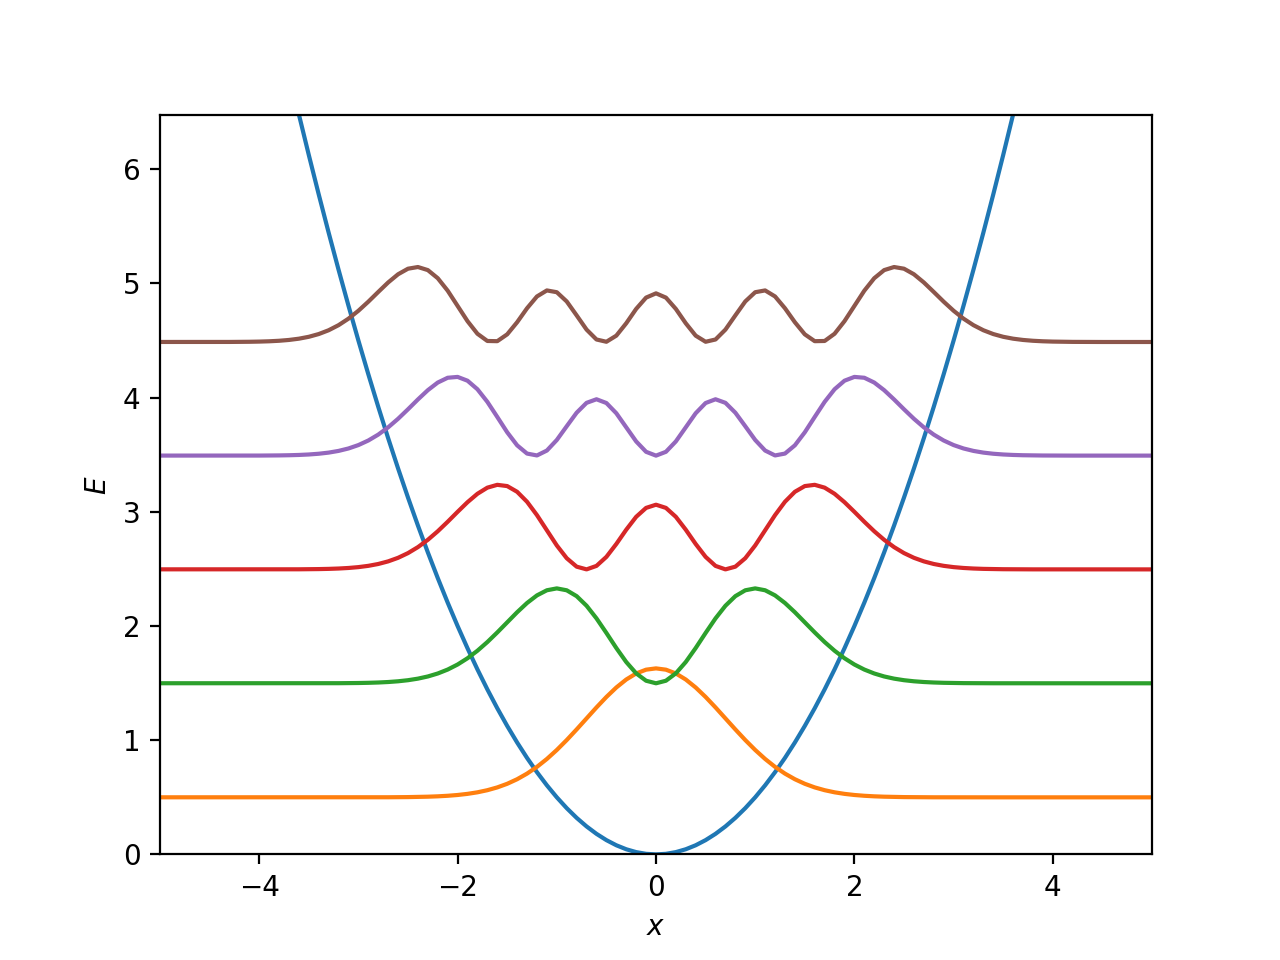

Ground State Norm =  1.0


In [159]:
plt.figure()
plt.plot(x, Vs)
scaling=20
print("Ground State Norm = ", np.dot(evecs[:,0],evecs[:,0]))
for i in range(0,5):
    plt.plot(x, scaling*evecs[:,i]*evecs[:,i]+evals[i])
plt.ylim([0,evals[6]])
plt.xlim([-5,5])
plt.xlabel(r'$x$')
plt.ylabel(r'$E$')
plt.show()

<IPython.core.display.Javascript object>


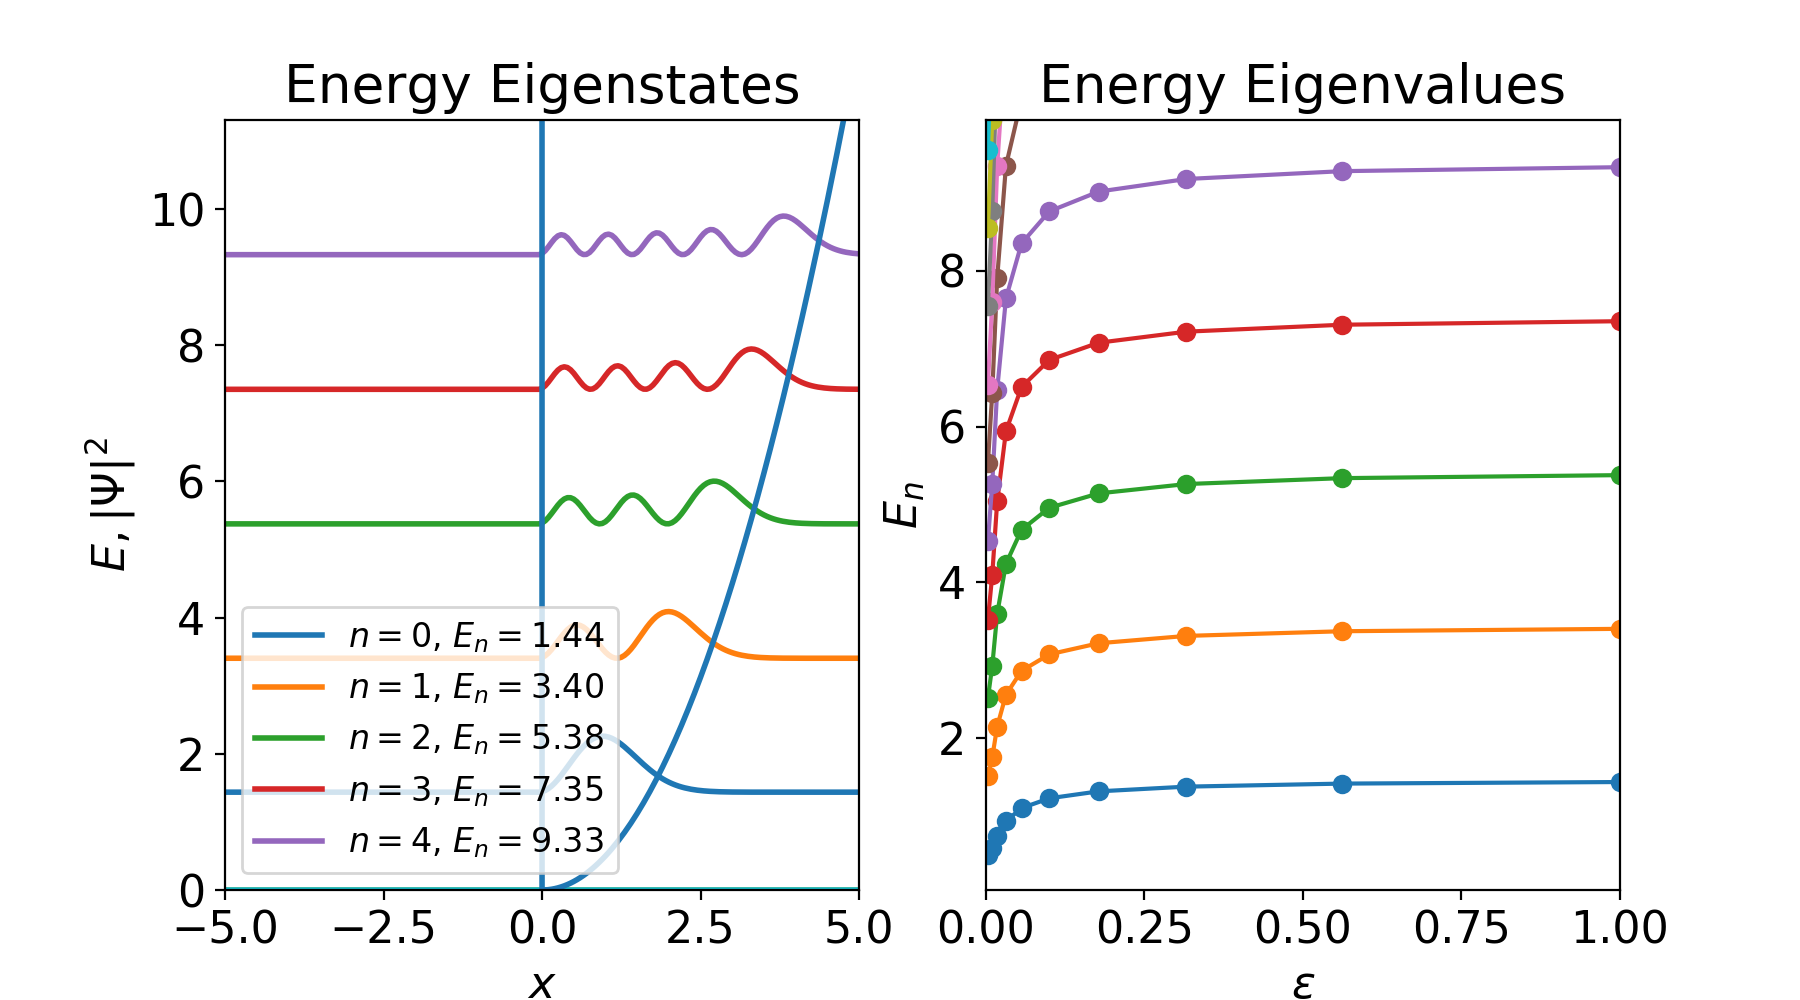

interactive(children=(FloatSlider(value=1.0, description='$\\omega$', max=5.0, min=0.2, step=0.2), FloatLogSli…

In [171]:

plt.rc('font', size=16)
plt.rc('legend', fontsize=12) 

scaling = 20
x = np.arange(-10,10,0.05)
def solve_SHO(omega, epsilon):
    
    H = -1./2*second_deriv(x) + V_matrix(x, omega, epsilon)
   # Vs = V(x)
    (evals, evecs) = np.linalg.eigh(H)
    return (evals, evecs)

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_ylabel(r'$E_n$')
ax1.set_xlabel(r'$\epsilon$')
ax1.set_xlim([0,1])
ax1.set_title('Energy Eigenvalues')

(evals, evecs) = solve_SHO(1,0)

max_N = 10
history = 10
lines=[]
energy_pts = []
for i in range(0, max_N):
    line, = ax.plot(x, scaling*evecs[:,i]*evecs[:,i]+evals[i], lw=2, label=r'$n=$'+str(i)+r', $E_n=$'+str('%.2f'%evals[i]))
    lines.append(line)
    energy_pt, = ax1.plot([0]*history,[evals[i]]*history,'-o')
    energy_pts.append(energy_pt)
    
V_line, = ax.plot(x, V(x,1,0), lw=2)
    
ax.legend(loc=3)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$E,|\Psi|^2$')
ax.set_title('Energy Eigenstates')
ax.set_ylim([0,evals[max_N]])
ax.set_xlim([-5,5])

def displace(a,ep):
    size = len(a)
    b = np.zeros_like(a, dtype=float)
    b[1:] = a[0:size-1]
    b[0] = ep
    return b

def update(omega=1, epsilon=0, max_N=5):
    (evals, evecs) = solve_SHO(omega, epsilon)
    for i in range(0, max_N):
        line = lines[i]
        line.set_ydata(scaling*evecs[:,i]*evecs[:,i]+evals[i])
        line.set_label(r'$n=$'+str(i)+r', $E_n=$'+str('%.2f'%evals[i]))
        
    for i in range(max_N,10):
        line = lines[i]
        line.set_ydata(0*evecs[:,i])
        
    for i in range(0, 10):
        energy_pt = energy_pts[i]
        ex_data = energy_pt.get_xdata()
        ey_data = energy_pt.get_ydata()        
        ex_data = displace(ex_data, epsilon)
        ey_data = displace(ey_data, evals[i])        
        energy_pt.set_xdata(ex_data)
        energy_pt.set_ydata(ey_data)
        
    V_line.set_ydata(V(x,omega, epsilon))
    ax.set_ylim([0,evals[max_N]])
    ax.legend(handles=lines[0:max_N], loc=3)
    fig.canvas.draw()

#interact(update, dt=(0.1,5,0.1), lambda_=(0.1,1,0.05));
interact(update, omega=widgets.FloatSlider(min=0.2,max=5,step=0.2,value=1, description=r'$\omega$'),
        epsilon=widgets.FloatLogSlider(base=10, min=-3,max=0,step=0.25,value=0, description=r'$\epsilon$'),
        max_N=widgets.BoundedIntText(value=5, min=1, max=10, step=1, description=r'$N_{max}$', disabled=False));